# Python intro

Topics for today

- NumPy arrays and vectorization
- Styleguides
- Plots

### Use numpy arrays, not lists!

- Available all necessary math operations with vectors, matrices and tensors
- Optimized implementation: more details in the next week lectures
- Easy to use!

In [1]:
import numpy as np

n = 3
A = np.random.randn(n, n)
x = np.random.randn(n)
print(A)
print(A @ x)
print(A.dot(x))
print(np.dot(A, x))

[[-0.05198975 -1.6177936   0.35738491]
 [-0.80003032  0.16986904  0.67194215]
 [ 0.19633626 -0.43916397 -0.27970723]]
[-1.37406971  1.36160486 -0.81299262]
[-1.37406971  1.36160486 -0.81299262]
[-1.37406971  1.36160486 -0.81299262]


In [2]:
print("Trace of the matrix =", np.trace(A))
print("Diagonal of the matrix =", np.diag(A))
print("Different sums")
print("Sum all elements in the matrix", np.sum(A))
print("Sum all evelements over rows \n {} \n and columns \n {}".format(np.sum(A, 1), np.sum(A, 0)))
print("Inverse matrix =", np.linalg.inv(A))

Trace of the matrix = -0.16182793439617754
Diagonal of the matrix = [-0.05198975  0.16986904 -0.27970723]
Different sums
Sum all elements in the matrix -1.793152495765186
Sum all evelements over rows 
 [-1.31239843  0.04178087 -0.52253494] 
 and columns 
 [-0.65568381 -1.88708852  0.74961984]
Inverse matrix = [[ 0.99283899 -2.44404555 -4.60278254]
 [-0.36832635 -0.22306953 -1.00649561]
 [ 1.27521176 -1.36532279 -5.22573727]]


### Broadcasting

-  Is it possible to compute $A + x$ for the matrix $A$ and vector $x$?

In [3]:
print(A)
print(x)
print(A + x)
print(A * x)

[[-0.05198975 -1.6177936   0.35738491]
 [-0.80003032  0.16986904  0.67194215]
 [ 0.19633626 -0.43916397 -0.27970723]]
[-0.95002605  1.02064703  0.63722582]
[[-1.00201579 -0.59714657  0.99461074]
 [-1.75005637  1.19051607  1.30916797]
 [-0.75368979  0.58148306  0.3575186 ]]
[[ 0.04939162 -1.65119622  0.2277349 ]
 [ 0.76004964  0.17337633  0.42817889]
 [-0.18652456 -0.4482314  -0.17823667]]


### And what about columns?

In [4]:
print(A)
print(x)
print(A + x[:, np.newaxis])

[[-0.05198975 -1.6177936   0.35738491]
 [-0.80003032  0.16986904  0.67194215]
 [ 0.19633626 -0.43916397 -0.27970723]]
[-0.95002605  1.02064703  0.63722582]
[[-1.00201579 -2.56781964 -0.59264113]
 [ 0.22061671  1.19051607  1.69258918]
 [ 0.83356208  0.19806186  0.3575186 ]]


### One more example

In [6]:
i = np.arange(4)
j = np.arange(4)
mat = i[:, None] - j[None, :]
print(mat)

[[ 0 -1 -2 -3]
 [ 1  0 -1 -2]
 [ 2  1  0 -1]
 [ 3  2  1  0]]


### No loops!

- Avoid loops wherever its possible!
- Loops in Python are very slow
- Use initializers from NumPy

In [7]:
%%timeit
a = []
n = 100000
for i in range(n):
    a.append(1)

7.06 ms ± 544 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
%timeit np.ones(n)
%timeit [1 for i in range(n)]

1.58 µs ± 76.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
419 ns ± 19.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [11]:
print(np.zeros(3))
print(np.ones((3, 3)))
print(np.eye(3))
print(np.arange(3))

[0. 0. 0.]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[0 1 2]


### Styleguides

- You write code not for you, but for people who will read it!
- Remember about proper naming
- Spaces between math operators and arguments
- PEP8 (PEP = Python Enhancement Proposal) http://legacy.python.org/dev/peps/pep-0008/
- Google Python Styleguide: http://google.github.io/styleguide/pyguide.html 

## Plotting

- Use matplotlib library
- Check the following parts of plots
    - Scale (log vs. linear)
    - Fontsize in axis labels
    - Fontsize in ticks
    - Fontsize in legend
    - Clear difference between lines colours and/or markers
    - Grid if necessary

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
c = 1.
num_points = 100
method_1 = [c / k**5 for k in range(1, num_points)]
method_2 = [c * 0.5**k for k in range(1, num_points)]

Text(0.5, 0, 'Number of iterations')

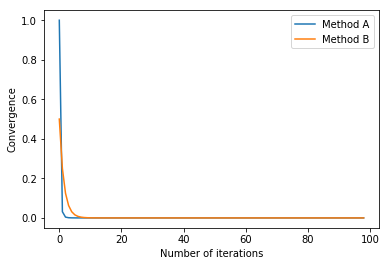

In [14]:
plt.plot(method_1, label="Method A")
plt.plot(method_2, label="Method B")
plt.legend()
plt.ylabel("Convergence")
plt.xlabel("Number of iterations")

### If you leave this plot as it is, you will get penalty!

(array([1.e-36, 1.e-32, 1.e-28, 1.e-24, 1.e-20, 1.e-16, 1.e-12, 1.e-08,
        1.e-04, 1.e+00, 1.e+04, 1.e+08]),
 <a list of 12 Text yticklabel objects>)

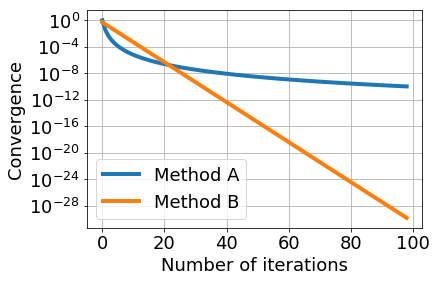

In [15]:
plt.plot(method_1, label="Method A", linewidth=4)
plt.plot(method_2, label="Method B", linewidth=4)
plt.legend(fontsize=18)
plt.ylabel("Convergence", fontsize=18)
plt.xlabel("Number of iterations", fontsize=18)
plt.yscale("log")
plt.grid(True)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

(array([1.e-36, 1.e-32, 1.e-28, 1.e-24, 1.e-20, 1.e-16, 1.e-12, 1.e-08,
        1.e-04, 1.e+00, 1.e+04, 1.e+08]),
 <a list of 12 Text yticklabel objects>)

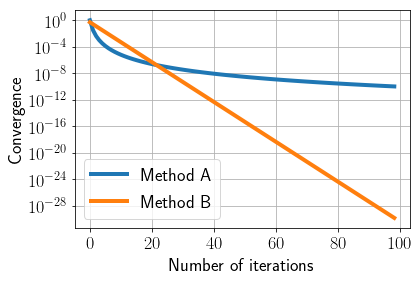

In [16]:
plt.rc("text", usetex=True)
plt.plot(method_1, label="Method A", linewidth=4)
plt.plot(method_2, label="Method B", linewidth=4)
plt.legend(fontsize=18)
plt.ylabel("Convergence", fontsize=18)
plt.xlabel("Number of iterations", fontsize=18)
plt.yscale("log")
plt.grid(True)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

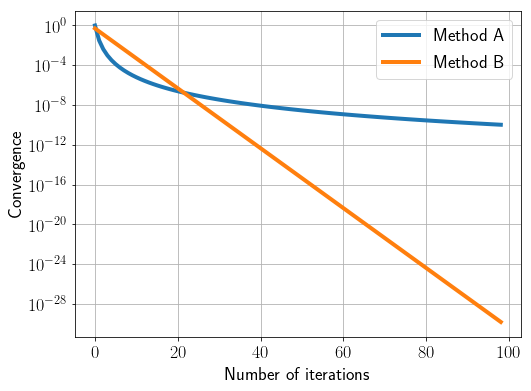

In [17]:
plt.figure(figsize=(8, 6))
plt.plot(method_1, label="Method A", linewidth=4)
plt.plot(method_2, label="Method B", linewidth=4)
plt.legend(fontsize=18)
plt.ylabel("Convergence", fontsize=18)
plt.xlabel("Number of iterations", fontsize=18)
plt.yscale("log")
plt.grid(True)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

## Summary

- Use NumPy objects
- Check styleguides to write readable code!
- Make nice plots with clear desciptions and conclusions